# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

In [1]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/22/2d/9c0b76f2f9cc0ebede1b9371b6f317243028ed60b90705863d493bae622e/ipywidgets-8.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.12 from https://files.pythonhosted.org/packages/21/02/88b65cc394961a60c43c70517066b6b679738caf78506a5da7b88ffcb643/widgetsnbextension-4.0.13-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.12 from https://files.pythonhosted.org/packages/a9/93/858e87edc634d628e5d752ba944c2833133a28fa87bb093e6832ced36a3e/jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.7 MB/s eta 0:00:0000:01

[noti

## Import Resources

In [2]:
# TODO: Make all necessary imports.
import tensorflow as tf 
import numpy as np
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import time
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import json

2024-12-20 16:59:08.572460: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-20 16:59:08.572547: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-20 16:59:08.572622: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.14.0
	• Running on GPU


In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [6]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)

# TODO: Create a training set, a validation set and a test set.
training_set, validation_set, test_set = dataset['train'],dataset['validation'], dataset['test']
print(dataset_info)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<14:02,  2.58s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<13:59,  2.58s/ MiB]

Dl Size...:   1%|          | 3/328 [00:02<13:57,  2.58s/ MiB]

Dl Size...:   1%|          | 4/328 [00:02<13:54,  2.58s/ MiB]

Dl Size...:   2%|▏         | 5/328 [00:02<13:52,  2.58s/ MiB]

Dl Si

Dl Size...:  16%|█▋        | 54/328 [00:04<00:28,  9.51 MiB/s]

Dl Size...:  17%|█▋        | 55/328 [00:04<00:28,  9.51 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:04<00:28,  9.51 MiB/s]

Extraction completed...: 0 file [00:04, ? file/s]
Dl Size...:  17%|█▋        | 57/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:04<00:16, 16.13 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:04<00:16, 16.1

Dl Size...:  35%|███▌      | 115/328 [00:06<00:10, 20.89 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:06<00:10, 20.89 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:06<00:10, 20.89 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:06<00:10, 20.89 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  36%|███▋      | 119/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:06<00:08, 24.04 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00

Dl Size...:  54%|█████▎    | 176/328 [00:08<00:05, 25.76 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:08<00:05, 25.76 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:08<00:05, 25.76 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:08<00:05, 25.76 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:08<00:05, 25.76 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:08<00:05, 25.76 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:08<00:05, 25.76 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  56%|█████▌    | 183/328 [00:08<00:05, 28.19 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:08<00:05, 28.19 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:08<00:05, 28.19 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:08<00:05, 28.19 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:08<00:05, 28.19 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:08<00:04, 28.19 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:08<00:04, 28.19 MiB/s]

Dl Size...:  58%|█████▊    | 190/328 [00

Dl Size...:  72%|███████▏  | 236/328 [00:10<00:03, 28.88 MiB/s]

Dl Size...:  72%|███████▏  | 237/328 [00:10<00:03, 28.88 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:10<00:03, 28.88 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:10<00:03, 28.88 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:10<00:03, 28.88 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:10<00:03, 28.88 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:10<00:02, 28.88 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:10<00:02, 28.88 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:10<00:02, 28.88 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:10<00:02, 28.88 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:10<00:02, 28.88 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:10<00:02, 28.88 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  76%|███████▌  | 248/328 [00:10<00:02, 30.05 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:10<00:02, 30.05 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00

Dl Size...:  91%|█████████ | 297/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  95%|█████████▍| 311/328 [00:12<00:00, 31.06 MiB/s]

Dl Size...:  95%|████████

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Extraction completed...:   0%|          | 0/8189 [01:44<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s],  7.29 file/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s], 32.52 file/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 31.21 MiB/s]

Extraction completed...: 

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Extraction completed...:  17%|█▋        | 1372/8189 [01:55<01:48, 63.12 file/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 31.21 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Extraction completed...:  21%|██        | 1735/8189 [01:59<01:11, 90.60 file/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Extraction completed...:  30%|███       | 2475/8189 [02:05<00:48, 118.28 file/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Extraction completed...:  35%|███▍      | 2845/8189 [02:08<00:44, 121.32 file/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Extraction completed...:  39%|███▉      | 3219/8189 [02:11<00:42, 116.84 file/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Extraction completed...:  54%|█████▍    | 4453/8189 [02:21<00:30, 121.06 file/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Extraction completed...:  67%|██████▋   | 5527/8189 [02:30<00:22, 119.22 file/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Extraction completed...:  82%|████████▏ | 6749/8189 [02:40<00:11, 121.17 file/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:40<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:41<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Extraction completed...:  87%|████████▋ | 7117/8189 [02:44<00:08, 120.58 file/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:49<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Extraction completed...:  96%|█████████▌| 7841/8189 [02:50<00:02, 118.41 file/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:50<00:00, 31.21 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:51<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:52<00:00, 31.21 MiB/s]

Dl Size...: 100%|████████

Generating test examples...:  86%|████████▌ | 5301/6149 [00:03<00:00, 1766.16 examples/s]
                                                                                         
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteZV1W8E/oxford_flowers102-test.tfrecord*...:   0%|          | 0/6149 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteZV1W8E/oxford_flowers102-test.tfrecord*...:  15%|█▍        | 900/6149 [00:00<00:00, 8997.56 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteZV1W8E/oxford_flowers102-test.tfrecord*...:  29%|██▉       | 1800/6149 [00:00<00:00, 6687.88 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteZV1W8E/oxford_flowers102-test.tfrecord*...:  46%|████▌     | 2807/6149 [00:00<00:00, 7987.55 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteZV1W8E/oxford_flowers102

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more 

## Explore the Dataset

In [7]:
# TODO: Get the number of examples in each set from the dataset info.
num_training = dataset_info.splits['train'].num_examples
num_validation = dataset_info.splits['validation'].num_examples
num_testing = dataset_info.splits['test'].num_examples
print(f"Number of training examples: {num_training}")
print(f"Number of validation examples: {num_validation }")
print(f"Number of test examples: {num_testing}")
# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes

print(f"Number of classes: {num_classes}")

Number of training examples: 1020
Number of validation examples: 1020
Number of test examples: 6149
Number of classes: 102


In [8]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    print('\n\u2022 shape:', image.shape, '\n\u2022 label:', label )


• shape: (500, 667, 3) 
• label: tf.Tensor(72, shape=(), dtype=int64)

• shape: (500, 666, 3) 
• label: tf.Tensor(84, shape=(), dtype=int64)

• shape: (670, 500, 3) 
• label: tf.Tensor(70, shape=(), dtype=int64)


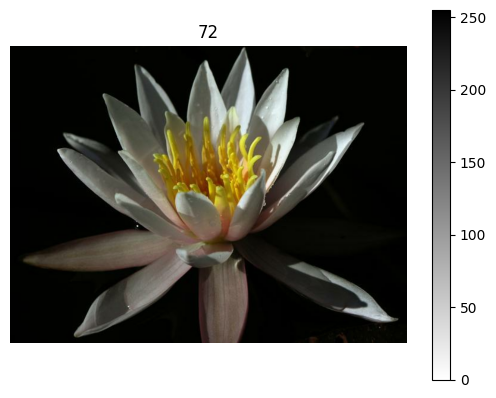

In [9]:
# TODO: Plot 1 image from the training set. Set the title
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap= plt.cm.binary)
plt.axis('off')
plt.colorbar()
# of the plot to the corresponding image label. 
plt.title(label)

plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [10]:

with open('label_map.json', 'r') as f:
    class_names = json.load(f)

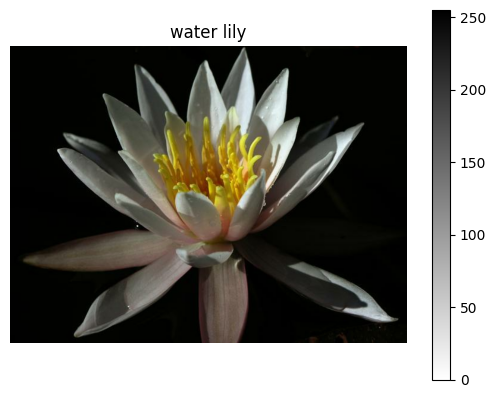

In [11]:
# TODO: Plot 1 image from the training set. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap= plt.cm.binary)
plt.axis('off')
plt.colorbar()
#Set the title  of the plot to the corresponding class name. 
plt.title(class_names[str(label)])

plt.show()


## Create Pipeline

In [12]:
# TODO: Create a pipeline for each set.
image_size = 224
batch_size = 64
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    image = image / 255.0  # Normalize to [0, 1]
    return image, label
train_data = dataset['train'].map(preprocess_image).shuffle(1000).batch(32).prefetch(1)
validation_data = dataset['validation'].map(preprocess_image).batch(32).prefetch(1)
test_data = dataset['test'].map(preprocess_image).batch(32).prefetch(1)

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [13]:
# TODO:define the model and build it.
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
image_shape=(224, 224,3)
feature_extractor = hub.KerasLayer(URL, input_shape=image_shape, trainable = False)


model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(102, activation='softmax')
])



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2388646 (9.11 MB)
Trainable params: 130662 (510.40 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [15]:
# trainig the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Stop training when there is no improvement
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)


history = model.fit( train_data,
                      validation_data=validation_data,
                     epochs=15 
                   )

Epoch 1/15
32/32 [==============================] - 26s 299ms/step - loss: 4.3420 - accuracy: 0.0882 - val_loss: 3.1241 - val_accuracy: 0.3657
Epoch 2/15
32/32 [==============================] - 10s 169ms/step - loss: 2.1115 - accuracy: 0.6843 - val_loss: 2.0247 - val_accuracy: 0.6431
Epoch 3/15
32/32 [==============================] - 9s 172ms/step - loss: 1.1278 - accuracy: 0.8765 - val_loss: 1.5459 - val_accuracy: 0.7294
Epoch 4/15
32/32 [==============================] - 9s 171ms/step - loss: 0.6784 - accuracy: 0.9569 - val_loss: 1.3024 - val_accuracy: 0.7480
Epoch 5/15
32/32 [==============================] - 9s 172ms/step - loss: 0.4497 - accuracy: 0.9824 - val_loss: 1.1536 - val_accuracy: 0.7863
Epoch 6/15
32/32 [==============================] - 9s 169ms/step - loss: 0.3196 - accuracy: 0.9941 - val_loss: 1.0651 - val_accuracy: 0.7804
Epoch 7/15
32/32 [==============================] - 9s 173ms/step - loss: 0.2362 - accuracy: 0.9961 - val_loss: 1.0047 - val_accuracy: 0.7951
Epoc

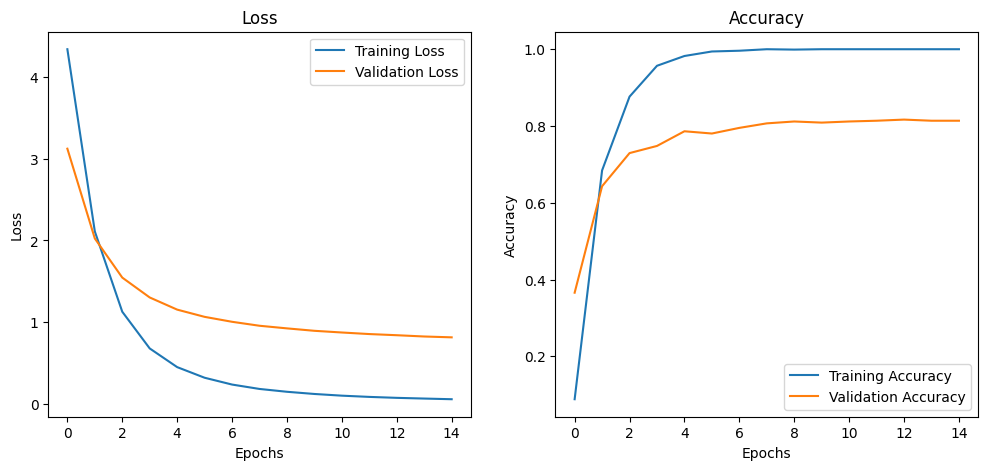

In [16]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
# Plot loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()






## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [17]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


193/193 [==============================] - 25s 126ms/step - loss: 0.9404 - accuracy: 0.7770
Test Loss: 0.9404
Test Accuracy: 0.7770


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [18]:
# TODO: Save your trained model as a Keras model.
model.save("Project_Image_Classifier_Project.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Keras Model

Load the Keras model you saved above.

In [19]:
# TODO: Load the Keras model
reloaded_model = tf.keras.models.load_model("Project_Image_Classifier_Project.h5", custom_objects={'KerasLayer':hub.KerasLayer})


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [20]:
# TODO: Create the process_image function
def process_image(image):
    image = tf.convert_to_tensor(image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image.numpy()


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

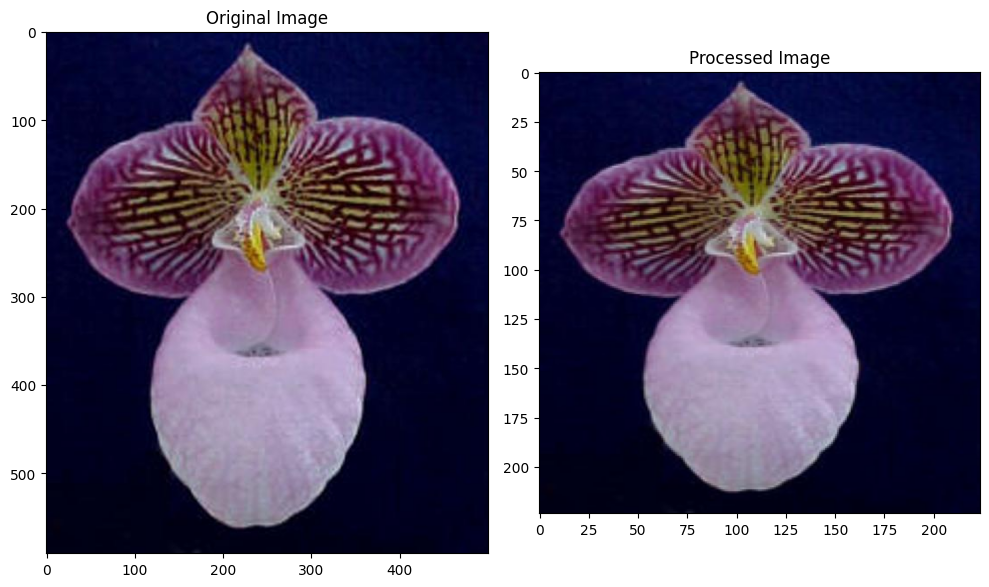

In [21]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [22]:
# TODO: Create the predict function
def predict(image_path, model, top_k):
    image = Image.open(image_path)
    image = np.asarray(image)
    image = process_image(image)
    _image = np.expand_dims(image, axis = 0)
    predictions =  model.predict(_image)
    top_k_values, top_k_indices = tf.nn.top_k(predictions, k= top_k)
    return top_k_values.numpy(), top_k_indices.numpy(), image




# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 1s 1s/step


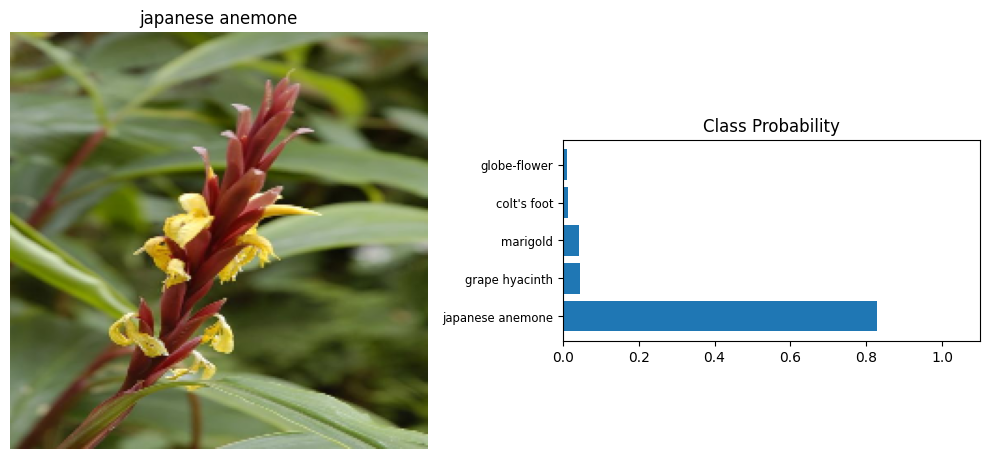

1/1 [==============================] - 0s 28ms/step


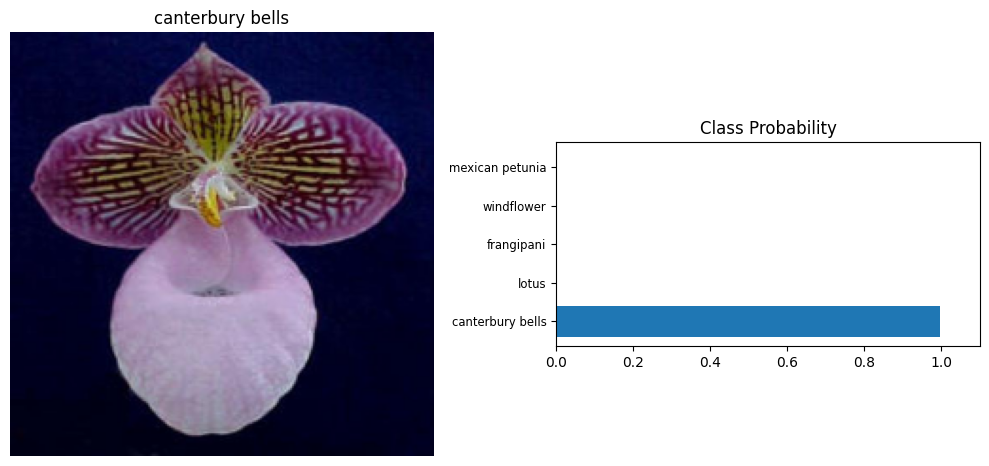

1/1 [==============================] - 0s 39ms/step


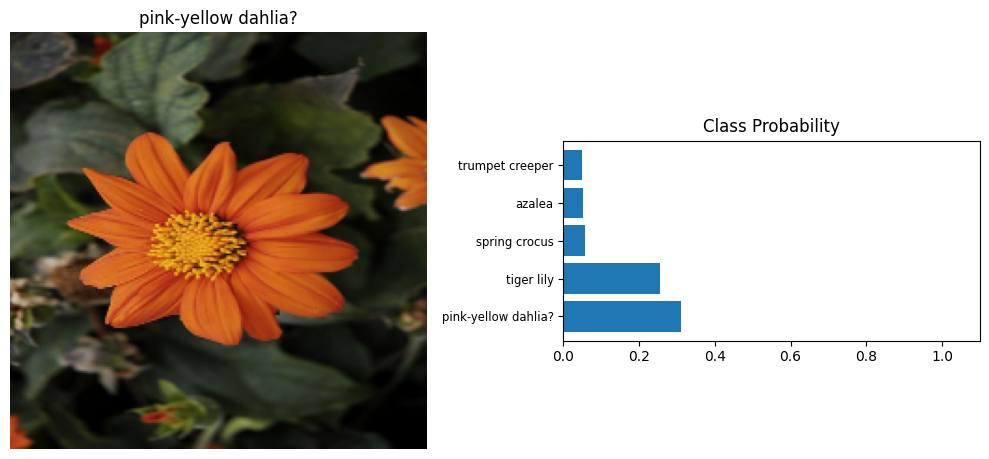

1/1 [==============================] - 0s 44ms/step


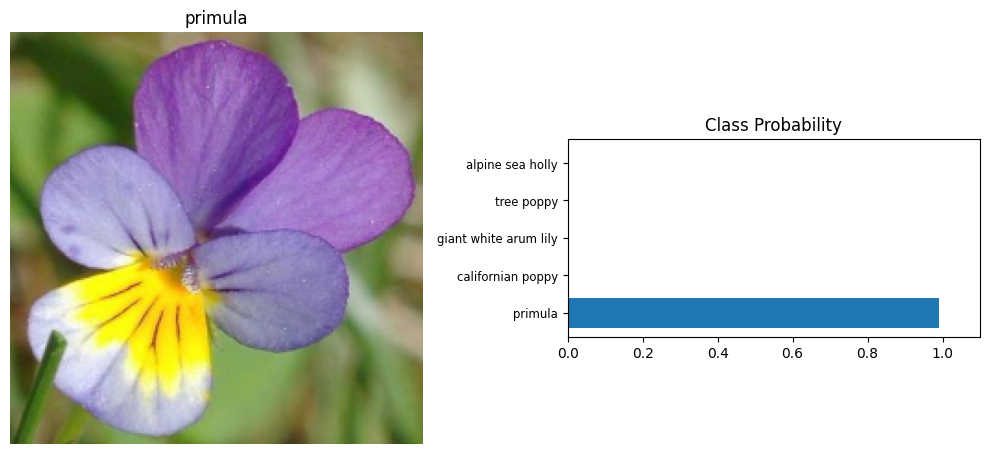

In [23]:
# TODO: Plot the input image along with the top 5 classes
images = ['cautleya_spicata.jpg', 'hard-leaved_pocket_orchid.jpg', 'orange_dahlia.jpg', 'wild_pansy.jpg']
for image in images:
    top_k = 5
    try:
        image_path = './test_images/{}'.format(image)
        probs, classes, image = predict(image_path, reloaded_model, top_k)
    except IOError:
        print(f"Error: Unable to open {image_path}")
        continue
    
    names = []
    for i in classes[0]:
        key = str(i + 1)  # Adjust or remove "+1" based on class_names indices
        if key in class_names:
            names.append(class_names[key])
        else:
            names.append("Unknown Class")
            print(f"Warning: Predicted class {key} not found in class_names.")
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 10), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title(names[0])
    
    ax2.barh(np.arange(len(probs[0])), probs[0])
    ax2.set_yticks(np.arange(len(probs[0])))
    ax2.set_yticklabels(names, size='small')
    ax2.set_aspect(0.1)
    ax2.set_xlim(0, 1.1)
    ax2.set_title('Class Probability')
    plt.tight_layout()
    plt.show()